In [6]:
%matplotlib inline
import grale.lenses as lenses
import grale.plotutil as plotutil
import grale.feedback as feedback
from grale.cosmology import Cosmology
from grale.constants import *
import numpy as np
import matplotlib.pyplot as plt

In [7]:
V = lambda x, y: np.array([x,y], dtype="double")

feedback.setDefaultFeedback("notebook")
cosm = Cosmology(0.7,0.3,0,0.7)

zd = 0.5
zs = 1.5
Dd = cosm.getAngularDiameterDistance(zd)
Ds = cosm.getAngularDiameterDistance(zs)
Dds = cosm.getAngularDiameterDistance(zd, zs)

In [8]:
nie = lenses.SIELens(Dd, { "velocityDispersion": 600000, "ellipticity": 0.8})

In [9]:
lensInfo = { 
    "lens": nie,
    "bottomleft": V(-10,-10)*ANGLE_ARCSEC,
    "topright": V(10,10)*ANGLE_ARCSEC,
    "Ds": Ds,
    "Dds": Dds
}

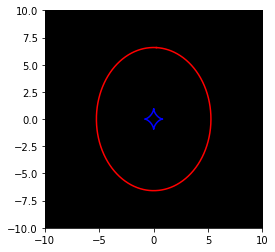

In [10]:
plotutil.plotImagePlane(lensInfo, angularUnit=ANGLE_ARCSEC)

In [11]:
comp = lenses.CompositeLens(Dd, [ {"lens": nie, "factor": 1, "angle":30, "x": 5*ANGLE_ARCSEC, "y": 0 }])

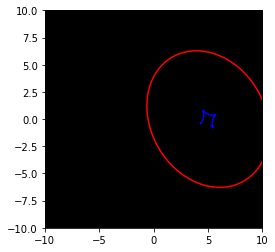

In [12]:
lensInfo2 = { 
    "lens": comp,
    "bottomleft": V(-10,-10)*ANGLE_ARCSEC,
    "topright": V(10,10)*ANGLE_ARCSEC,
    "Ds": Ds,
    "Dds": Dds
}

plotutil.plotImagePlane(lensInfo2, angularUnit=ANGLE_ARCSEC)

In [13]:
critDens = lenses.getCriticalDensity(Dd, Ds, Dds)
theta_s = 5*ANGLE_ARCSEC
r_s = theta_s*Dd
rho_s = critDens/r_s
nfw = lenses.NFWLens(Dd, { "rho_s": rho_s, "theta_s": theta_s})

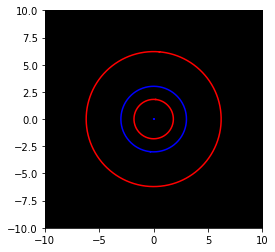

In [14]:
plotutil.plotImagePlane({ 
    "lens": nfw,
    "bottomleft": V(-10,-10)*ANGLE_ARCSEC,
    "topright": V(10,10)*ANGLE_ARCSEC,
    "Ds": Ds,
    "Dds": Dds
}, angularUnit=ANGLE_ARCSEC)

In [15]:
q = 0.5
ellnfw = lenses.EllipticNFWLens(Dd, { "rho_s": rho_s, "theta_s": theta_s, "q": q})

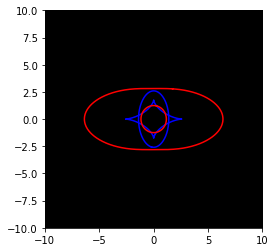

In [16]:
plotutil.plotImagePlane({ 
    "lens": ellnfw,
    "bottomleft": V(-10,-10)*ANGLE_ARCSEC,
    "topright": V(10,10)*ANGLE_ARCSEC,
    "Ds": Ds,
    "Dds": Dds
}, angularUnit=ANGLE_ARCSEC)

In [17]:
thetax, thetay = 0,2
ellnfw.getSurfaceMassDensity(V(thetax,thetay)*ANGLE_ARCSEC)

array([ 4.19474583])

In [18]:
nfw.getSurfaceMassDensity(V(thetax,thetay/q)*ANGLE_ARCSEC)

array([ 4.19474583])

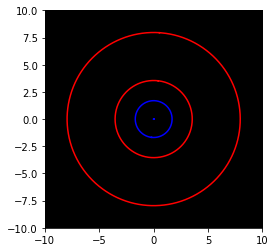

In [19]:
sersic = lenses.SersicLens(Dd, { "centraldensity": 10, "scale": 7*ANGLE_ARCSEC, "index": 1})
plotutil.plotImagePlane({ 
    "lens": sersic,
    "bottomleft": V(-10,-10)*ANGLE_ARCSEC,
    "topright": V(10,10)*ANGLE_ARCSEC,
    "Ds": Ds,
    "Dds": Dds
}, angularUnit=ANGLE_ARCSEC)

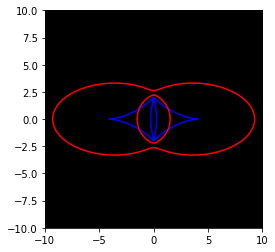

In [20]:
ellsersic = lenses.EllipticSersicLens(Dd, { "centraldensity": 10, "scale": 7*ANGLE_ARCSEC, "index": 1, "q": q})
plotutil.plotImagePlane({ 
    "lens": ellsersic,
    "bottomleft": V(-10,-10)*ANGLE_ARCSEC,
    "topright": V(10,10)*ANGLE_ARCSEC,
    "Ds": Ds,
    "Dds": Dds
}, angularUnit=ANGLE_ARCSEC)

In [22]:
ellsersic.getSurfaceMassDensity(V(thetax,thetay)*ANGLE_ARCSEC)

array([ 5.64718122])

In [23]:
sersic.getSurfaceMassDensity(V(thetax,thetay/q)*ANGLE_ARCSEC)

array([ 5.64718122])